# Analysing exam grade trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [84]:
grades = pd.read_csv('data/psi_grades.csv')
# get rid of nans in the Esito column:
grades = grades.dropna(subset=['Esito'])

In [85]:
# remove rows where Esito == "ASS":
grades = grades[grades['Esito'] != 'ASS']
# remove rows where Esito == 0
grades = grades[grades['Esito'] != '0']
# where Esito == "RIT" put -1
grades.loc[grades['Esito'] == 'RIT', 'Esito'] = -1

In [86]:
grades['Esito'] = grades['Esito'].astype(int)

In [87]:
grades.sort_values(by='Esito', ascending=False, inplace=True)
grade_counts = grades.groupby('Esito').count()
grade_counts.drop(['Anno Freq.', 'Misure Compensative'], axis=1, inplace=True)
grade_counts.columns = ['Count']

In [88]:
grade_counts

,Count
Esito,
-1,53
1,4
3,6
4,4
5,12
6,9
7,12
8,17
9,12


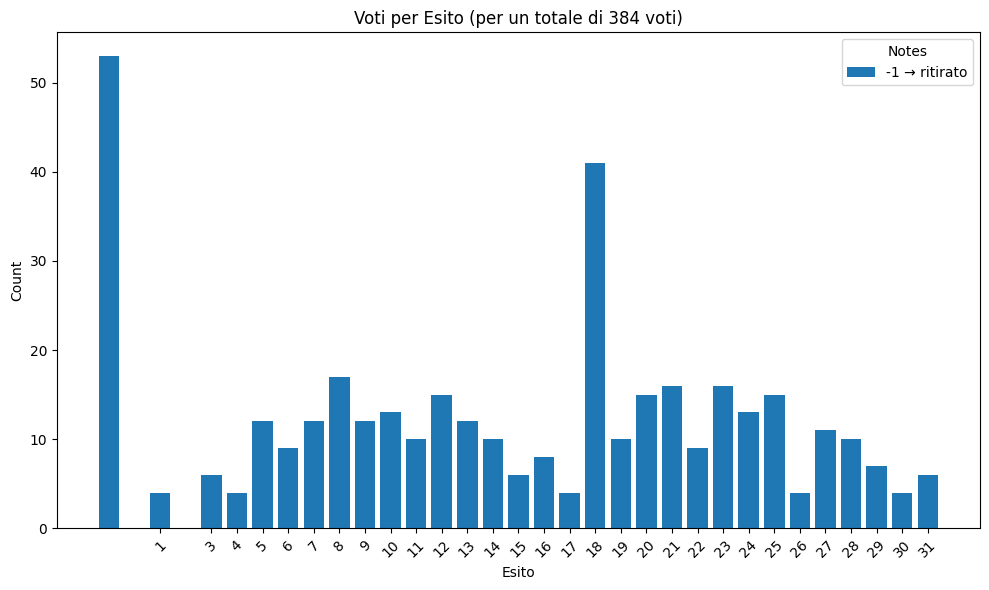

In [98]:
# sort by index (Esito) so bars are ordered
grade_counts = grade_counts.sort_index()

# plot as bar chart
plt.figure(figsize=(10, 6))  # bigger chart
plt.bar(grade_counts.index, grade_counts['Count'])

plt.xlabel('Esito')
plt.ylabel('Count')
plt.title('Voti per Esito (per un totale di ' + str(grade_counts['Count'].sum()) + ' voti)')
plt.xticks(rotation=45)  # tilt labels if many categories
plt.xticks(grade_counts.index[1:])  # show all grades on x-axis

plt.legend(title="Notes", labels=[
    "-1 → ritirato",
    "0 → insufficiente"
])

plt.tight_layout()
plt.show()